### EDA

Görs generellt på träningsdatan endast för att undvika dataläckage. 

Var försiktig med att göra åtgärder innan modellering. 

Identifiera mönster - Behöver vi göra en modell? 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cars = pd.read_csv('car_price_dataset.csv', sep=';')

1. Förstå datasetet

In [19]:
print(cars.shape) # Antalet rader och kolumner
print(cars.info()) # Datatyper
print(cars.head()) # Se exempel

(10000, 10)
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  str    
 1   Model         10000 non-null  str    
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  str    
 5   Transmission  10000 non-null  str    
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), str(4)
memory usage: 1.0 MB
None
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440

2. Deskriptiv statistik

* Förstå spridning. Medelpris = Typiskt värde. Variation/standardavvikelse = Hur mycket skiljer sig värdena åt. Extremvärden = Misstänkta outliers. 
* Upptäcka fel och konstiga värden. Tex negativa värden eller outliers. Kategorier med få observationer kanske inte har tillräckligt med data för analys och måste slås ihop med en annan kategori. 
* Hjälp för att tolka modellens prediktioner senare.

I vår bilprisdata:
- Medelpris: ~8850 kr
- Year: 2000-2023 (median 2012)
- Mileage: stor spridning (25-300k km) → outliers troliga


In [20]:
print(cars.describe())
print("\nKategoriska variabler:")
print("Brand:\n", cars['Brand'].value_counts())
print("\nFuel_Type:\n", cars['Fuel_Type'].value_counts())
print("\nTransmission:\n", cars['Transmission'].value_counts())

               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  

Kategoriska variabler:
Brand:
 Brand
Ford          1048
Audi          1038
Volkswagen    

3. Hitta saknade värden

In [21]:
print(cars.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


4. Visualisera data

* Histogram --> fördelning
* Boxplot --> outliers
* Scatterplot --> samband

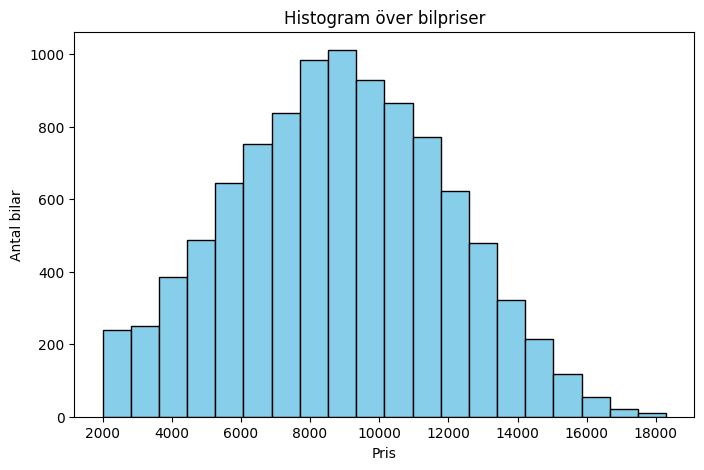

In [22]:
plt.figure(figsize=(8,5))
plt.hist(cars['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

# Visar på form på fördelning: Symmetrisk (normalfördelad), skev åt höger, skev åt vänster

Hur långt från medelvärdet värdena ligger --> stor eller liten spridning. 

Vissa modeller är mycket känsliga för stor spridning.

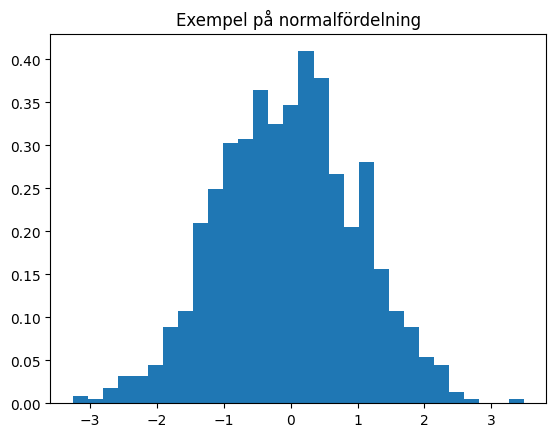

In [23]:
data = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data, bins=30, density=True)
plt.title("Exempel på normalfördelning")
plt.show()

C:\Users\tommi_bdmz4mu\AppData\Local\Temp\ipykernel_32612\4266532192.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=brands, patch_artist=True)


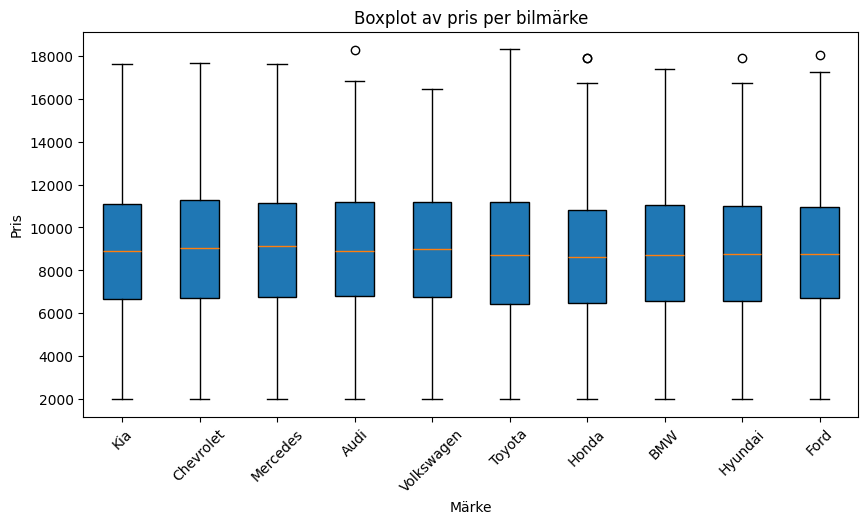

In [24]:
plt.figure(figsize=(10,5))
brands = cars['Brand'].unique()
data_to_plot = [cars[cars['Brand']==brand]['Price'] for brand in brands]

plt.boxplot(data_to_plot, labels=brands, patch_artist=True)
plt.title("Boxplot av pris per bilmärke")
plt.xlabel("Märke")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.show()
# Identifiera outliers som är relativa till gruppen, inte hela datan.

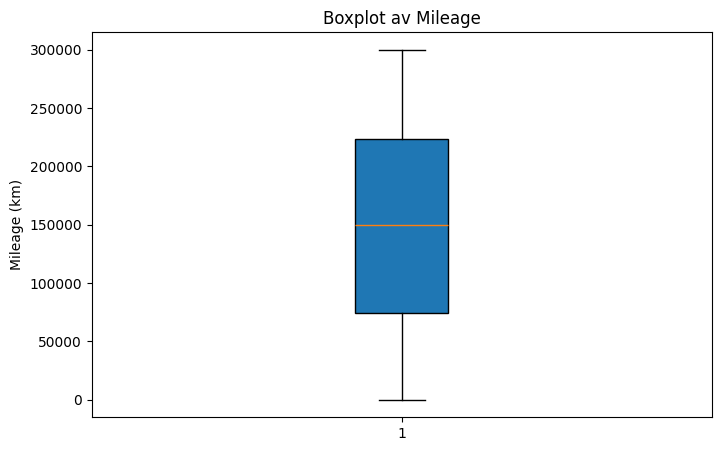

In [25]:
plt.figure(figsize=(8,5))
plt.boxplot(cars['Mileage'], patch_artist=True)
plt.title("Boxplot av Mileage")
plt.ylabel("Mileage (km)")
plt.show()

# Identifiera allmänna outliers. 

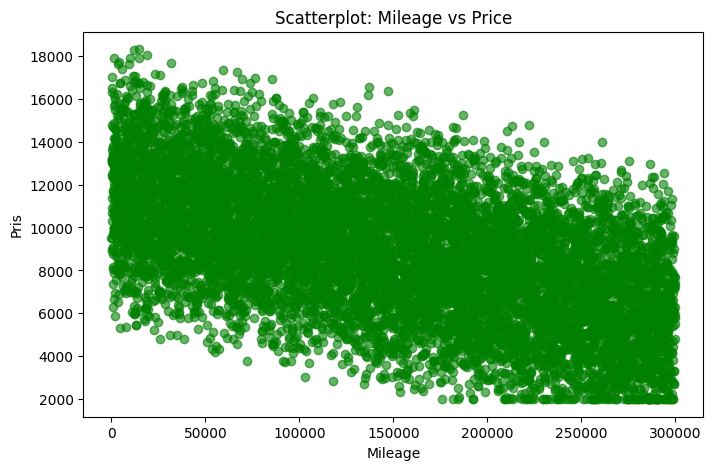

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(cars['Mileage'], cars['Price'], alpha=0.6, color='green')
plt.title("Scatterplot: Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Pris")
plt.show()

#### Normalfördelning 

Symmetrisk spridning runt medelvärdet med färre extremvärden.

Kan påverkar vissa modeller och andra inte om variabler inte är normalfördelade. 

Om residualerna i en regression är normalfördelade, kan vi korrekt ange sannolikheten för olika prediktioner och konfidensintervall.

Åtgärd: 

* Transformation av variabler kan vara nödvändig. 
* Ta bort outliers. 
* Prova annan modell som inte påverkas av skevhet. 

#### Outliers

Ett värde som avviker kraftigt från resten av datan. Kan påverka vår analys krafigt. Kan vara datafel eller naturliga variationer. 

Åtgärd: 

* Ta bort (om felaktiga tex)
* Använd en mer robust modell (kan dock bli onödigt komplex modell även om den fungerar bra med outliers i data)
* Transformera variabler för att minska påverkan
* Ingenting

#### icke-linjära samband

Kanske behöver vi en icke-linjär modell? 

#### Skalning

När behöver data skalas/normaliseras? 

* Om variabler mäts i helt olika enheter och skiljer sig mycket ifrån varandra eller har stor spridning
* När du ska använda en avståndsbaserad modell (Trädmodeller behöver normalt inte skalas)

5. Korrelationsanalys

Korrelationsanalys är viktigt för att förstå hur variabler samvarierar och vilka som kan vara viktiga i en modellering. 

Tittar på styrkan i ett **linjärt** samband. 

Förstå relationer till målvariablen. 
Ger tidiga hypoteser:
* "Year (årsmodell) verkar påverka priset starkt (korr 0.66)"
* "Mileage (miltal) har stark negativ relation (-0.55)"
* "Doors och Owner_Count har nästan ingen korrelation → kanske mindre viktiga"


* Variabler som inte alls korrelerar med målvariabeln → kanske inte användbara
* Variabler som är mycket korrelerade → risk för multikollinearitet. = Två (eller flera) förklarande variabler är starkt korrelerade med varandra i en modell, alltså modellen får flera variabler som säger samma sak (tex Year och Mileage kan ge liknande information om bilens ålder).


Åtgärd:

* Ta bort en av de korrelerade variablerna. 
* Slå ihop korrelerade variabler. 
* Används regularisering
* Dimensionsreducering (om tolkning inte är viktigt)
* Använd en annan modell.

In [27]:
# Korrelation mellan numeriska variabler och Price
numeric_cols = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
print(cars[numeric_cols].corr()['Price'].sort_values(ascending=False))

Price          1.000000
Year           0.663036
Engine_Size    0.357403
Owner_Count    0.002656
Doors          0.000511
Mileage       -0.551227
Name: Price, dtype: float64


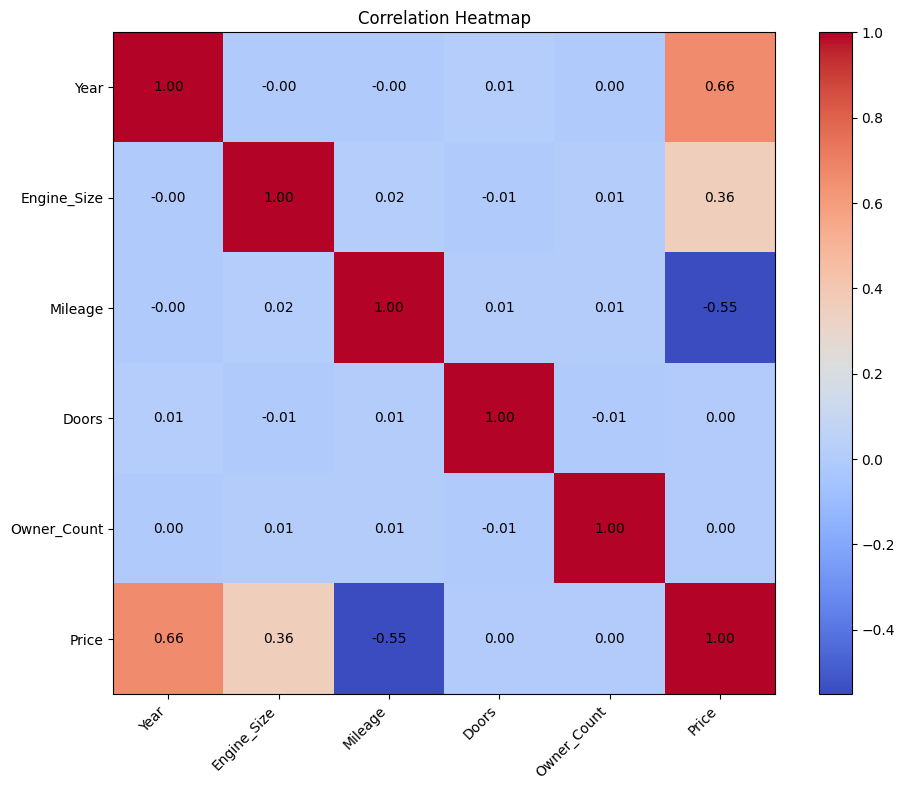

In [ ]:
# Korrelations heatmap

df_numeric = cars.select_dtypes(include='number')
corr = df_numeric.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# Rita heatmap
cax = ax.imshow(corr, cmap='coolwarm')

# Lägg till färgskala
fig.colorbar(cax)

# Sätt axel-etiketter
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# Visa korrelationsvärden i rutorna
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center", color="black")

ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Utforska gärna bibliotektet Seaborn för snyggare grafer med mindre kod. 

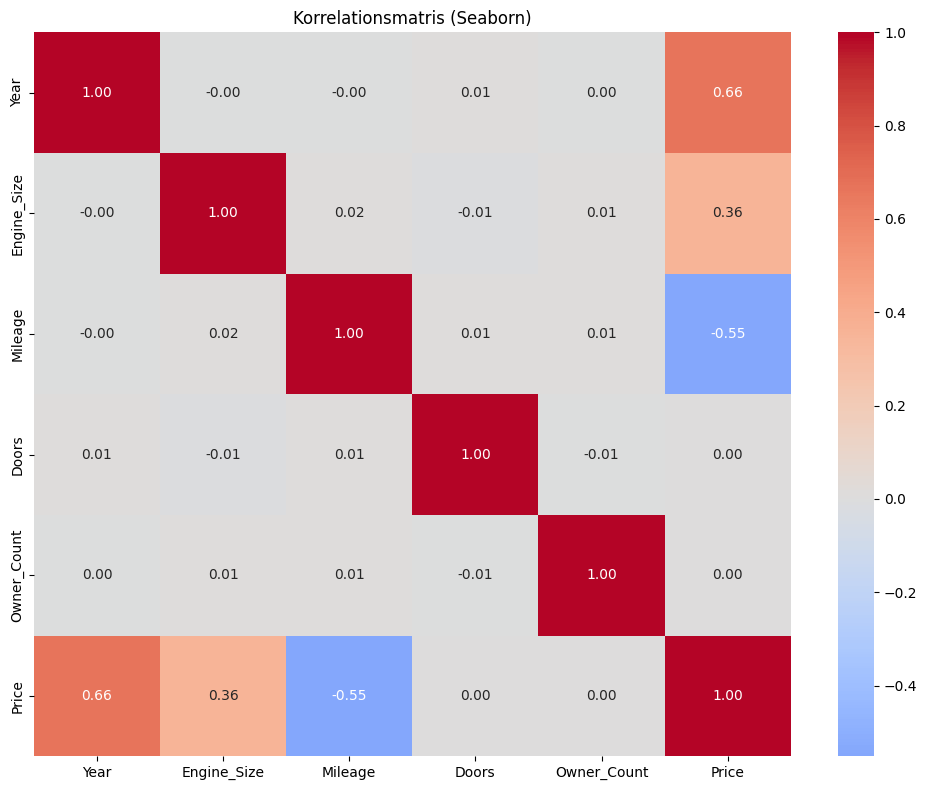

In [29]:
# alternativ till ovan

# Alternativ: Enklare heatmap med Seaborn (samma resultat)
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Korrelationsmatris (Seaborn)")
plt.tight_layout()
plt.show()


Heatmapen kan hjälpa dig med:

* Feature selection - Behåll variabler med stark korrelation med målvariabeln
* Identifiera redundanta variabler - Om två features är starkt korrelerade med varandra → välj en

Tänk på att heatmapen ger en indikation. Bara för att Year har en hög korrelation betyder inte det att det är årsmodellen som "orsakar" priset (kan vara kvalitet, teknikutveckling etc). Icke-linjära samband syns inte alltid. Variabel kan vara viktig trots låg korrelation.
